# Tutorial

Simulate genes under various levels of selection coefficient, with different demographic models (1,2,3-epoch) and with selection time between 15kya and 25 kya. Each scenario is run 3 times.

In [1]:
# bash generate_training_data.sh

In [2]:
import os
import gzip

import numpy as np
import scipy.stats

import skimage.transform
from keras import models, layers, optimizers, regularizers
from keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import pymc3
import pydot

Using TensorFlow backend.


In [3]:
%run -i ImaGene.py

For the first analysis, we seek to understand the impact of sorting images on the quantification. 
We use 1-epoch model for this first analysis.
Results will be visualised by linear regression plots.

Read simulations and store in object.

In [4]:
myfile = ImaFile(simulations_folder='/home/mfumagal/Data/ImaGene/Simulations1.Epoch1', nr_samples=128, model_name='Marth-1epoch-CEU')

In [5]:
mypop = myfile.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=500)

(optional) Save description of files in .json file

In [6]:
import json

with open('/home/mfumagal/Data/ImaGene/simulations1.Epoch1.json', 'w') as fp:
    json.dump(mypop.description, fp, sort_keys=True, allow_nan=False, indent=4)

(optional) Save the original data object.

In [7]:
import _pickle as pickle

In [8]:
# to save, create folder
os.mkdir('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1')

In [9]:
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop','wb') as fp:
    pickle.dump(mypop, fp)

In [10]:
# to load:
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop','rb') as fp:
    mypop = pickle.load(fp)

Explore the object (with nrepl=20 we have 40100 images).

In [11]:
mypop.summary()

An object of 20500 images
Rows: min 128, max 128, mean 128.000000, std 0.000000
Columns: min 100, max 470, mean 303.265122, std 47.633684


0

In [12]:
print(len(mypop.data))
print(mypop.data[0].shape)
print(mypop.data[0].dtype)

20500
(128, 388, 1)
uint8


Plot one image for no selection, at 1% and at 2%

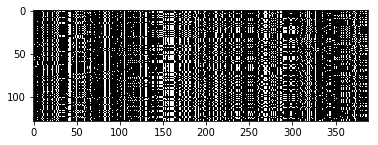

{'name': '/home/mfumagal/Data/ImaGene/Simulations1.Epoch1/msms..20...0100..txt.gz', 'Nref': 10000, 'nr_chroms': 128, 'nr_replicates': 20000, 'mutation_rate': 60.0, 'recombination_rate': 40.0, 'recombination_rate_nr_sites': 10000, 'selection_position': 0.5, 'selection_start_time': 0.01, 'selection_start_frequency': 0.005, 'selection_coeff_HOMO': 40.0, 'selection_coeff_hetero': 20.0, 'selection_coeff_homo': 0.0, 'model': 'Marth-1epoch-CEU', 'modification_stamp': 1546529619.5737383, 'active': 'active'}


In [13]:
mypop.plot(0)
print(mypop.description[0])

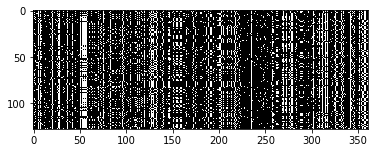

{'name': '/home/mfumagal/Data/ImaGene/Simulations1.Epoch1/msms..0...0100..txt.gz', 'Nref': 10000, 'nr_chroms': 128, 'nr_replicates': 20000, 'mutation_rate': 60.0, 'recombination_rate': 40.0, 'recombination_rate_nr_sites': 10000, 'selection_position': 0.5, 'selection_start_time': 0.01, 'selection_start_frequency': 0.005, 'selection_coeff_HOMO': 0.0, 'selection_coeff_hetero': 0.0, 'selection_coeff_homo': 0.0, 'model': 'Marth-1epoch-CEU', 'modification_stamp': 1546529544.929294, 'active': 'active'}


(128, 361, 1)

In [14]:
idx = np.where(mypop.target==0)[0][0]
mypop.plot(idx)
print(mypop.description[idx])
mypop.data[idx].shape

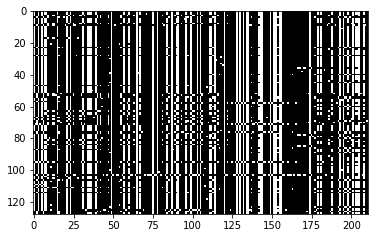

{'name': '/home/mfumagal/Data/ImaGene/Simulations1.Epoch1/msms..400...0100..txt.gz', 'Nref': 10000, 'nr_chroms': 128, 'nr_replicates': 20000, 'mutation_rate': 60.0, 'recombination_rate': 40.0, 'recombination_rate_nr_sites': 10000, 'selection_position': 0.5, 'selection_start_time': 0.01, 'selection_start_frequency': 0.005, 'selection_coeff_HOMO': 800.0, 'selection_coeff_hetero': 400.0, 'selection_coeff_homo': 0.0, 'model': 'Marth-1epoch-CEU', 'modification_stamp': 1546530833.4447079, 'active': 'active'}


(128, 211, 1)

In [15]:
idx = np.where(mypop.target==400)[0][0]
mypop.plot(idx)
print(mypop.description[idx])
mypop.data[idx].shape

Switch to major/minor allele polarisation.

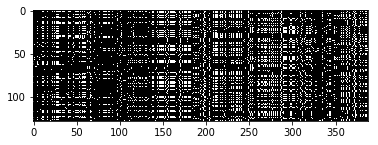

0

In [16]:
mypop.majorminor()
mypop.plot(0)

Filter out rare variants.

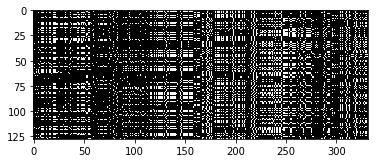

(128, 332, 1)

In [17]:
mypop.filter_freq(0.01)
mypop.plot(0)
mypop.data[0].shape

In [18]:
mypop.summary()

An object of 20500 images
Rows: min 128, max 128, mean 128.000000, std 0.000000
Columns: min 59, max 402, mean 243.107268, std 45.928052


0

In [19]:
# optional
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','wb') as fp:
    pickle.dump(mypop, fp)

Sort images using different orderings.
Then resize to same dimensions 128x128.
Then convert them to float numpy arrays and shuffle using the same order.

In [20]:
shuffle_index = np.random.permutation(len(mypop.data))

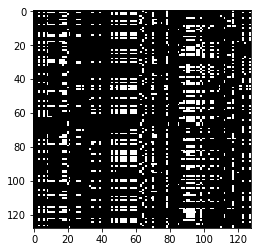

Converting to numpy array.
Converting to float32.
Converting to [0,1].
A numpy array with dimensions (20500, 128, 128, 1) and target with length 20500 and 41 classes.


In [21]:
## NONE
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.resize((128, 128))
mypop.plot(0)
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered_sortednone','wb') as fp:
    pickle.dump(mypop, fp)

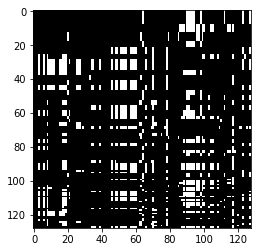

Converting to numpy array.
Converting to float32.
Converting to [0,1].
A numpy array with dimensions (20500, 128, 128, 1) and target with length 20500 and 41 classes.


In [22]:
## ROWS FREQ
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('rows_freq')
mypop.resize((128, 128))
mypop.plot(0)
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered_sortedrowsfreq','wb') as fp:
    pickle.dump(mypop, fp)

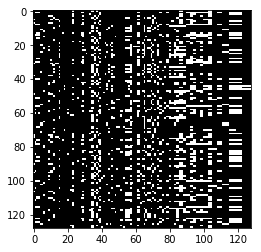

Converting to numpy array.
Converting to float32.
Converting to [0,1].
A numpy array with dimensions (20500, 128, 128, 1) and target with length 20500 and 41 classes.


In [23]:
## COLS FREQ
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('cols_freq')
mypop.resize((128, 128))
mypop.plot(0)
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered_sortedcolsfreq','wb') as fp:
    pickle.dump(mypop, fp)

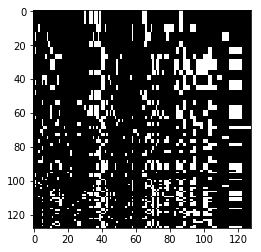

Converting to numpy array.
Converting to float32.
Converting to [0,1].
A numpy array with dimensions (20500, 128, 128, 1) and target with length 20500 and 41 classes.


In [24]:
## ROWS+COLS FREQ
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('rows_freq')
mypop.sort('cols_freq')
mypop.resize((128, 128))
mypop.plot(0)
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered_sortedrowscolsfreq','wb') as fp:
    pickle.dump(mypop, fp)

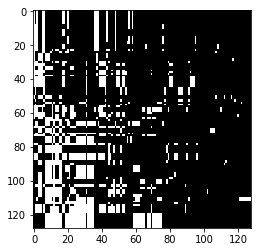

Converting to numpy array.
Converting to float32.
Converting to [0,1].
A numpy array with dimensions (20500, 128, 128, 1) and target with length 20500 and 41 classes.


In [25]:
## ROWS+COLS DISTANCE
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('rows_distance_top')
mypop.sort('cols_distance_top')
mypop.resize((128, 128))
mypop.plot(0)
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered_sortedrowscolsdist','wb') as fp:
    pickle.dump(mypop, fp)

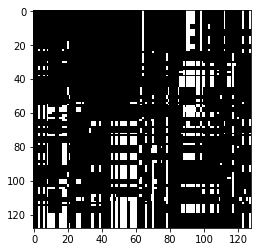

Converting to numpy array.
Converting to float32.
Converting to [0,1].
A numpy array with dimensions (20500, 128, 128, 1) and target with length 20500 and 41 classes.


In [26]:
## ROWS DISTANCE
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('rows_distance_top')
mypop.resize((128, 128))
mypop.plot(0)
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered_sortedrowsdist','wb') as fp:
    pickle.dump(mypop, fp)

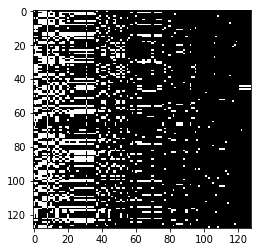

Converting to numpy array.
Converting to float32.
Converting to [0,1].
A numpy array with dimensions (20500, 128, 128, 1) and target with length 20500 and 41 classes.


In [27]:
## COLS DISTANCE
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('cols_distance_top')
mypop.resize((128, 128))
mypop.plot(0)
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered_sortedcolsdist','wb') as fp:
    pickle.dump(mypop, fp)

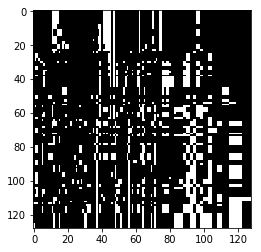

Converting to numpy array.
Converting to float32.
Converting to [0,1].
A numpy array with dimensions (20500, 128, 128, 1) and target with length 20500 and 41 classes.


In [28]:
## ROWS DISTANCE + COLS FREQ
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('rows_distance_top')
mypop.sort('cols_freq')
mypop.resize((128, 128))
mypop.plot(0)
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered_sortedrowsdistcolsfreq','wb') as fp:
    pickle.dump(mypop, fp)